# Exploration du dataset Breast Cancer de scikit-learn

## Chargement du dataset et des librairies nécessaires

In [1]:
import sklearn
from sklearn.datasets import load_breast_cancer
import pandas as pd
import matplotlib.pyplot as plt


C:\Users\basti\AppData\Local\Temp\ipykernel_3716\818781662.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
# Liste des classes
print(data.target_names)

# Liste des features
print(data.feature_names)

['malignant' 'benign']
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


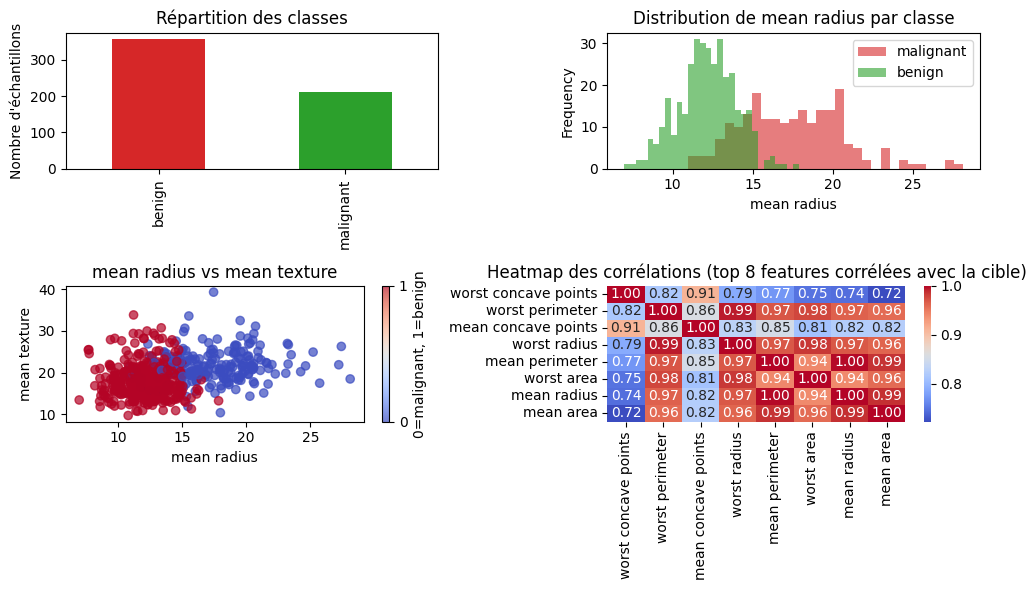

In [3]:
import seaborn as sns

# Plusieurs visualisations possibles pour explorer les données
plt.figure(figsize=(10,6))
# target en labels
target = pd.Series(data.target).map({0: "malignant", 1: "benign"})

# 2x2 subplots
plt.subplot(2,2,1)
target.value_counts().plot(kind='bar', color=['#d62728','#2ca02c'])
plt.title("Répartition des classes")
plt.ylabel("Nombre d'échantillons")

plt.subplot(2,2,2)
df[df.index.isin(target[target=="malignant"].index)]['mean radius'].plot(kind='hist', bins=30, alpha=0.6, label='malignant', color='#d62728')
df[df.index.isin(target[target=="benign"].index)]['mean radius'].plot(kind='hist', bins=30, alpha=0.6, label='benign', color='#2ca02c')
plt.title("Distribution de mean radius par classe")
plt.xlabel("mean radius")
plt.legend()

plt.subplot(2,2,3)
sc = plt.scatter(df['mean radius'], df['mean texture'], c=data.target, cmap='coolwarm', alpha=0.7)
plt.title("mean radius vs mean texture")
plt.xlabel("mean radius")
plt.ylabel("mean texture")
plt.colorbar(sc, ticks=[0,1], label='0=malignant, 1=benign')

plt.subplot(2,2,4)
# choisir les 8 features les plus corrélées avec la cible pour la heatmap
corr_with_target = df.corrwith(pd.Series(data.target)).abs().sort_values(ascending=False)
top_feats = corr_with_target.index[:8].tolist()
sns.heatmap(df[top_feats].corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Heatmap des corrélations (top 8 features corrélées avec la cible)")

plt.tight_layout()